## **Simple Linear Regression**

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [50]:
dt_st=pd.read_csv("delivery_time.csv")

In [51]:
dt_st.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [52]:
dt_st=dt_st.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [53]:
print(dt_st)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [54]:
dt_st.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

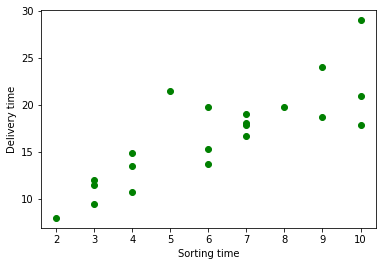

In [55]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb50528190>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb50528c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb50521b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb504b1710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb504b1c50>],
 'means': []}

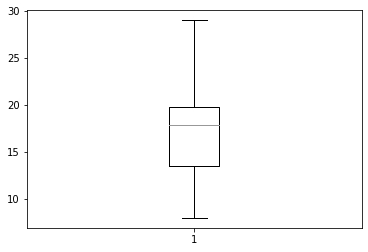

In [56]:
plt.boxplot(dt_st.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <a list of 5 Patch objects>)

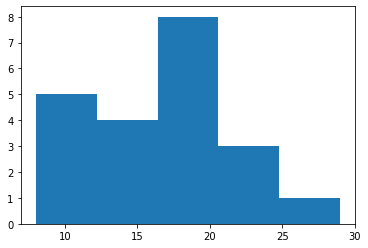

In [57]:
plt.hist(dt_st.dt, bins=5)

In [59]:
model2=smf.ols("dt~st",data=dt_st).fit()

In [60]:
model2.params

Intercept    6.582734
st           1.649020
dtype: float64

In [61]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        13:39:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model3=smf.ols("dt~np.log(st)",data=dt_st).fit()

In [65]:
model3.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [66]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        13:40:09   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [68]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [69]:
pred2 = model2.predict(dt_st) # Predicted values of dt using the model

In [70]:
pred3 = model3.predict(dt_st) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

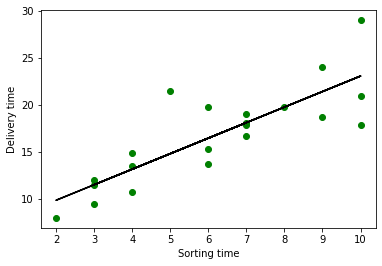

In [71]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.plot(dt_st.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

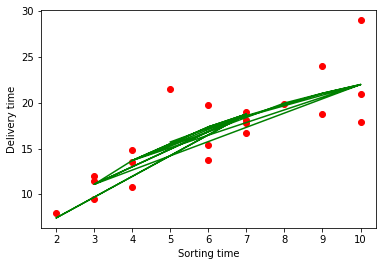

In [72]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='red')
plt.plot(dt_st.st, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

#  **2) Salary_hike -> Build a prediction model for Salary_hike**

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [5]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **TRANSFORMATION**

In [74]:
dataset.head()

,YE,Sa
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [75]:
dataset= dataset.rename(columns={'YearsExperience':'YE', 'Salary':'Sa'})

In [76]:
print(dataset)

      YE        Sa
0    1.1   39343.0
1    1.3   46205.0
2    1.5   37731.0
3    2.0   43525.0
4    2.2   39891.0
5    2.9   56642.0
6    3.0   60150.0
7    3.2   54445.0
8    3.2   64445.0
9    3.7   57189.0
10   3.9   63218.0
11   4.0   55794.0
12   4.0   56957.0
13   4.1   57081.0
14   4.5   61111.0
15   4.9   67938.0
16   5.1   66029.0
17   5.3   83088.0
18   5.9   81363.0
19   6.0   93940.0
20   6.8   91738.0
21   7.1   98273.0
22   7.9  101302.0
23   8.2  113812.0
24   8.7  109431.0
25   9.0  105582.0
26   9.5  116969.0
27   9.6  112635.0
28  10.3  122391.0
29  10.5  121872.0


In [77]:
dataset.corr()

,YE,Sa
YE,1.000000,0.978242
Sa,0.978242,1.000000


In [78]:
model16=smf.ols('Sa~YE',data=dataset).fit()

In [79]:
model16.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           9.78e-20
Time:                        13:41:14   Log-Likelihood:                -28.465
No. Observations:                  30   AIC:                             60.93
Df Residuals:                      28   BIC:                             63.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.7962      0.667    -14.692      0.000     -11.162      -8.430
np.sqrt(Sa)     0.0557      0.002     23.025      0.000       0.051       0.061
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.215
Skew:                          -0.451   Prob(JB):                        0.330
Kurtosis:                       2.021   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
model17=smf.ols("YE~np.square(Sa)",data=dataset).fit()     #using square


In [82]:
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     499.6
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.15e-19
Time:                        13:41:20   Log-Likelihood:                -29.308
No. Observations:                  30   AIC:                             62.62
Df Residuals:                      28   BIC:                             65.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2802      0.218      5.886      0.000       0.835       1.726
np.square(Sa)  6.202e-10   2.77e-11     22.353      0.000    5.63e-10    6.77e-10
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.067
Skew:                          -0.208   Prob(JB):                        0.587
Kurtosis:                       2.175   Cond. No.                     1.40e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
model8=smf.ols("np.log(YE)~np.log(Sa)",data=dataset).fit()   #using log

In [84]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(YE)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        13:41:27   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(Sa)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model19=smf.ols("YE~np.sqrt(Sa)",data=dataset).fit()  #using square root

In [86]:
model19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           9.78e-20
Time:                        13:41:33   Log-Likelihood:                -28.465
No. Observations:                  30   AIC:                             60.93
Df Residuals:                      28   BIC:                             63.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.7962      0.667    -14.692      0.000     -11.162      -8.430
np.sqrt(Sa)     0.0557      0.002     23.025      0.000       0.051       0.061
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.215
Skew:                          -0.451   Prob(JB):                        0.330
Kurtosis:                       2.021   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **EDA and Data Visualization**

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YE      30 non-null     float64
 1   Sa      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
sns.distplot(dataset['YE'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


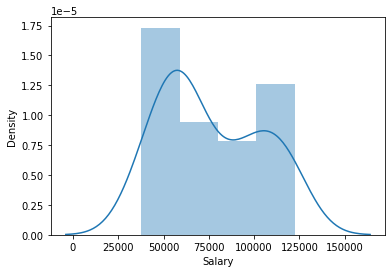

In [ ]:
sns.distplot(dataset['Salary'])

# **Correlation Analysis**

In [11]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


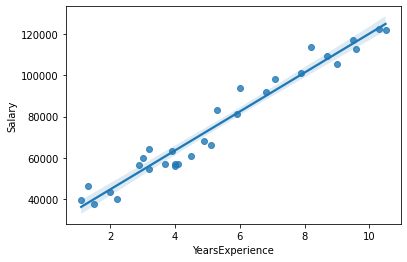

In [ ]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])


# **Model Building**

In [12]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        12:50:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Model Testing**

In [14]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [16]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# **Model Predictions**

In [18]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [19]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [21]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64